# Final Project Part 2

## Team: Sushanth Sreenivasa Babu (ss142), Divya Tantri (dtantri2), Adit Rathi (arathi7)¶

## Russia-Ukraine War Loss of Equipment and Personnel


The primary dashboard we've constructed here displays equipment losses for each day of the week, including airplanes, helicopters, tanks, APCs, field artillery, MRLs, military autos, fuel tanks, drones, navy ships, anti-aircraft warfare, special equipment, and mobile SRBM systems. We made a heatmap to show the weekdays and war days. When a region of the heatmap is selected, the dashboard may additionally generate a bar chart with the quantity of lost equipment. This is an example of the dashboard's interactivity. A second plot is driven by the heatmap, which depicts cumulative manpower losses vs. equipment losses up to the designated day.

As mentioned in part 2 of the project, we have further analysed a twitter dataset consisting tweets related to the on going conflict. On Kaggle, we discovered this fascinating dataset. https://www.kaggle.com/datasets/bwandowando/ukraine-russian-crisis-twitter-dataset-1-2-million-rows This collection contains daily Twitter datasets related to the ongoing Ukraine-Russia conflict. The information includes whether a tweet was retweeted or not, as well as people's views on the Russia-Ukraine conflict. It can also assist us in gathering information from trustworthy or government sources. We have included two visualizations for this dataset that visualize the top languages in which the tweets have been made and top locations where the Russia-Ukraine is most discussed about on twitter. 

Team member Adit prepared the twitter data for further analysis. I learnt about collectively importing compressed csv files into a single data frame. This was challenging as the size of the data was almost 6 gigabytes. After Data Cleaning, I was able to drop the unnecessary columns and reduce the size of the dataset to around 60 kilobytes. We decided to drop columns of text, hashtags and acctdesc in order to cut most of the bulk. We decide to analyse numeric data of the twitter dataset in this section. I further explored the library of seaborn and used the same for visualizing twitter data.

In [1]:
import numpy as np
import pandas as pd
import datetime
import ipywidgets as ipy
import seaborn as sns
import os
import gc

# Section 1

Russia may have lost 25% of its original assault force in four weeks of warfare. These losses are not on the magnitude of World War II, but they are significant when compared to the Russian military's current strength. Although reinforcements and replacements can help to offset some of these losses, the loss of trained personnel will impede military operations and have a political impact. The dashboard indicates how losses have mount up on the Russian side as the war proceeded. This dashboard lets the user segregate the russian losses equipment wise as well as stats on loss of personelle. 

In [2]:
df = pd.read_csv("russia_losses_equipment.csv") # Equipment data
df1 = pd.read_csv("russia_losses_personnel.csv") # Personnel data

eq = df[[ 'aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment',
       'mobile SRBM system']] # Equipments

df["Total"] = eq.sum(axis=1) # Total Equipment loss

# Merging the datasets into one dataframe
df['personnel'] = df1['personnel']
df['POW'] = df1['POW']
df
df['personnel loss per day'] = df['personnel'].diff() 
df['equipment loss per day'] = df['Total'].diff()
df.loc[(df['personnel loss per day'].isnull()),
       'personnel loss per day'] = df.loc[(df['personnel loss per day'].isnull()), 'personnel']
df.loc[(df['equipment loss per day'].isnull()), 
       'equipment loss per day'] = df.loc[(df['equipment loss per day'].isnull()), 'Total']
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].apply(lambda x: x.strftime('%A'))
df.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,...,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,Total,personnel,POW,personnel loss per day,equipment loss per day,day_of_week
0,2022-02-25,2,10,7,80,516,49,4,100,60,...,2,0,NaN,NaN,828.0,2800,0,2800.0,828.0,Friday
1,2022-02-26,3,27,26,146,706,49,4,130,60,...,2,0,NaN,NaN,1152.0,4300,0,1500.0,324.0,Saturday
2,2022-02-27,4,27,26,150,706,50,4,130,60,...,2,0,NaN,NaN,1157.0,4500,0,200.0,5.0,Sunday
3,2022-02-28,5,29,29,150,816,74,21,291,60,...,2,5,NaN,NaN,1480.0,5300,0,800.0,323.0,Monday
4,2022-03-01,6,29,29,198,846,77,24,305,60,...,2,7,NaN,NaN,1580.0,5710,200,410.0,100.0,Tuesday


In [3]:
import matplotlib.gridspec as gridspec
import matplotlib as mpl

def create_figure(plot1_f1,plot1_f2, plot2_f,plot3_f):
    
    with plt.style.context(("seaborn","ggplot")):
        fig = plt.figure(constrained_layout=False, figsize=(10, 8))
        specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig) ## Declaring 2x2 figure.

        ax1 = fig.add_subplot(specs[0, :]) ## First Row
        ax2 = fig.add_subplot(specs[1, 0]) ## Second Row First Column
        ax3 = fig.add_subplot(specs[1, 1]) ## Second Row Second Colums
        
        # First Graph - day vs total equipment
        
        ax1.bar(df[plot1_f1], df[plot1_f2],color = 'darkorange')

        ax1.set_xlabel(plot1_f1)
        ax1.set_ylabel(plot1_f2+" Loss")
        ax1.set_title(plot1_f1+" vs "+plot1_f2+" Loss")

        # Second Graph - day vs personnel loss
    
        ax2.plot(df[plot1_f1], df[plot2_f],color='red')
        ax2.legend(labels=[plot2_f])

        ax2.set_xlabel(plot1_f1)
        ax2.set_ylabel(plot2_f)
        ax2.set_title(plot1_f1+" vs "+plot2_f)

        # Third Graph - Histogram
        
        ax3.hist(df[plot3_f],color='skyblue')
    
        ax3.set_xlabel(plot3_f)
        ax3.set_ylabel("Count")
        ax3.set_title("Histogram of "+ plot3_f)
        
        plt.close(fig)
        return fig

Column
    [0] Row(align='center')
        [0] TextInput(name='plot1_f1', value='day')
        [1] Select(name='plot1_f2', options=['Total', 'aircraft', ...], value='Total')
    [1] Row(align='center')
        [0] Select(name='plot2_f', options=['personnel', 'POW'], value='personnel')
        [1] Select(name='plot3_f', options=['personnel loss per day',...], value='personnel loss per day')
    [2] Row
        [0] Matplotlib(Figure, name='interactive00101')
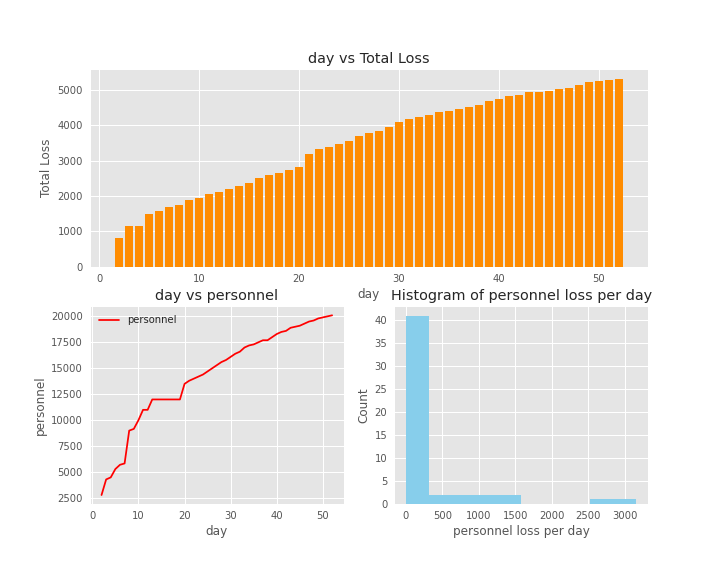

In [4]:
import panel as pn
pn.extension()

kw = dict(plot1_f1="day",
          plot1_f2=[ 'Total','aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment',
       'mobile SRBM system'],
          plot2_f=['personnel', 'POW'],
          plot3_f=['personnel loss per day', 'equipment loss per day'])

dash1 = pn.interact(create_figure, **kw)

dash1 = pn.Column(
                    pn.Row(dash1[0][0],dash1[0][1], align="center"),
                    pn.Row(dash1[0][2],dash1[0][3], align="center"),
                    dash1[1]
                 )
dash1

# Section 2

## Code used for Data Cleaning 

csv_collection = []
for dirname, _, filenames in os.walk('war_tweets'):
    for filename in filenames:
        fullpath= os.path.join(dirname, filename)
        csv_collection.append(fullpath)
        

df = pd.read_csv(csv_collection.pop(),compression = 'gzip', index_col=0)
for data in csv_collection:
    try:
        tmp = pd.read_csv(data, compression = 'gzip', index_col=0)
    except:
            tmp = pd.read_csv(data, index_col = 0)
            df = pd.concat([df, tmp], axis=0)

df.drop("acctdesc", axis=1, inplace=True)
df.drop("text", axis=1, inplace=True)
df.drop("hashtags", axis=1, inplace=True)

In [5]:
df2 = pd.read_csv("tweets_clean_data.csv") # Clean data

In [6]:
df2.head()

,Unnamed: 0,userid,username,location,following,followers,totaltweets,usercreatedts,tweetid,retweetcount,hashtags,language,coordinates
0,0,1400378624998445057,RealBitstarz,"Phoenix, AZ",169,16,1573,2021-06-03 09:08:12.000000,1508957175405817862,0,"[{'text': 'FREESPINS', 'indices': [0, 10]}, {'...",en,NaN
1,1,2722503240,vubblePOP,Everywhere,2176,3176,62609,2014-08-10 21:38:54.000000,1508957175477059590,0,"[{'text': 'Russia', 'indices': [133, 140]}, {'...",en,NaN
2,2,128366364,am_queretaro,"Querétaro, México.",287,179968,231246,2010-03-31 22:46:52.000000,1508957175724457986,0,"[{'text': 'Ucrania', 'indices': [63, 71]}]",es,NaN
3,3,1439945731129987073,wtxnewsusa,New York,44,140,3470,2021-09-20 13:33:25.000000,1508957175833538564,0,"[{'text': 'usanews', 'indices': [61, 69]}, {'t...",en,NaN
4,4,1250894403448823812,Jclami1,NaN,290,19,2957,2020-04-16 21:10:56.000000,1508957176227844110,164,"[{'text': 'Ucrania', 'indices': [55, 63]}, {'t...",es,NaN


## Languages most used for tweeting

Twitter is a platform used for several purposes. For sharing information, political point of views, announcements etc. It is a global platform with its users from different countries and different socio-cultural backgrounds.  Since the war broke out between the two countries, twitter has been flooded with tweets about the same. The languages most used for tweeting about this conflict are displayed below. English, German, Italian and French are the top languages that have been used in the tweets about the Russo-Ukranian war.

<AxesSubplot:ylabel='language'>

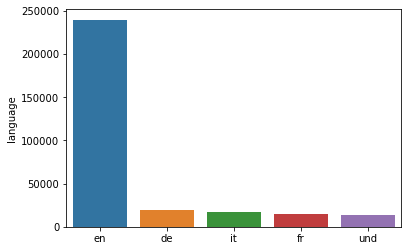

In [7]:
sns.barplot(x= df2.language.value_counts()[:5].index,y=df2.language.value_counts()[:5])

## Traffic Source Location

The maximum number of tweets generated about this global issue were from the victim nation of Ukraine. As the visualization depicts, around 3500 tweets were generated from Ukraine during the initial days of the war. Despite of having a major blow to the network infrastructure, Ukrainians kept the world informed about the current situation of their home. Further, USA, UK, France and India generated the most traffic of tweets on this topic.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

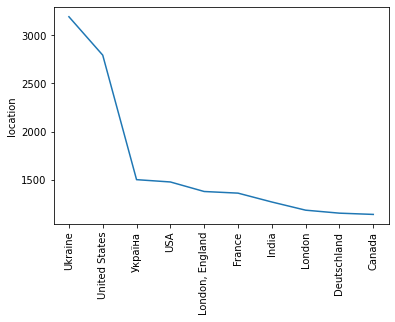

In [8]:
sns.lineplot(x= df2.location.value_counts()[:10].index,y=df2.location.value_counts()[:10])
plt.xticks(rotation=90)

## Users with most Retweets

The following scatterplot indicates the top 10 users with most retweets. It is interesting to know that the user with most retweets has been retweeted around 80,000 times. 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

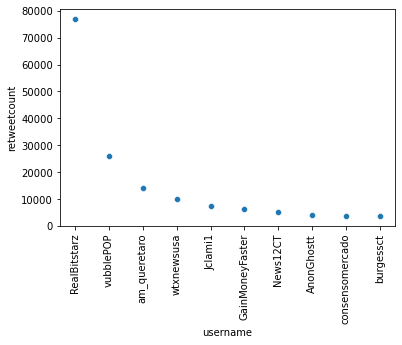

In [9]:
sns.scatterplot(x= df2.username[:10],y=df2.retweetcount.value_counts()[:10])
plt.xticks(rotation=90)

## Challenges faced and things we would like to do differently

One of the major difficulties we faced was dealing with the twitter data. The dataset file consisted of multiple compresse csvs. It was an interesting challenge to figure out how to combine this in a single dataframe. Due to the magnitude of the data, the compilation time for just importing the data was almost 40 minutes. Hence, the team decided to drop unnecessary columns that reduced the size of the data set. We exported this dataset and visualized the clean data.